## Reference
* https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f
* https://elitedatascience.com/overfitting-in-machine-learning#signal-vs-noise
* https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765


## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 208us/step - loss: 2.2733 - acc: 0.1517 - val_loss: 2.2300 - val_acc: 0.2031
Epoch 2/500
50000/50000 [==============================] - 9s 188us/step - loss: 2.2022 - acc: 0.2145 - val_loss: 2.1731 - val_acc: 0.2347
Epoch 3/500
50000/50000 [==============================] - 10s 202us/step - loss: 2.1512 - acc: 0.2428 - val_loss: 2.1263 - val_acc: 0.2561
Epoch 4/500
50000/50000 [==============================] - 9s 180us/step - loss: 2.1073 - acc: 0.2633 - val_loss: 2.0851 - val_acc: 0.2720
Epoch 5/500
50000/50000 [==============================] - 9s 174us/step - loss: 2.0683 - acc: 0.2789 - val_loss: 2.0485 - val_acc: 0.2835
Epoch 6/500
50000/50000 [==============================] - 9s 178us/step - loss: 2.0348 - acc: 0.2904 - val_loss: 2.0166 - val_acc: 0.3010
Epoch 7/500
50000/50000 [==============================] - 9s 177us/step - loss: 2.0053 - acc: 0.2997 - val_loss: 

50000/50000 [==============================] - 10s 196us/step - loss: 1.6491 - acc: 0.4255 - val_loss: 1.6546 - val_acc: 0.4237
Epoch 60/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.6458 - acc: 0.4258 - val_loss: 1.6549 - val_acc: 0.4239
Epoch 61/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.6429 - acc: 0.4264 - val_loss: 1.6487 - val_acc: 0.4237
Epoch 62/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.6399 - acc: 0.4281 - val_loss: 1.6488 - val_acc: 0.4267
Epoch 63/500
50000/50000 [==============================] - 10s 206us/step - loss: 1.6372 - acc: 0.4289 - val_loss: 1.6439 - val_acc: 0.4259
Epoch 64/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.6344 - acc: 0.4298 - val_loss: 1.6417 - val_acc: 0.4275
Epoch 65/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.6315 - acc: 0.4309 - val_loss: 1.6446 - val_acc: 0.4247
Epoch 66/500
50000/50000 [=

50000/50000 [==============================] - 8s 167us/step - loss: 1.5169 - acc: 0.4700 - val_loss: 1.5537 - val_acc: 0.4508
Epoch 118/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.5156 - acc: 0.4703 - val_loss: 1.5446 - val_acc: 0.4541
Epoch 119/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.5135 - acc: 0.4732 - val_loss: 1.5424 - val_acc: 0.4586
Epoch 120/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.5118 - acc: 0.4732 - val_loss: 1.5418 - val_acc: 0.4604
Epoch 121/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.5099 - acc: 0.4745 - val_loss: 1.5384 - val_acc: 0.4580
Epoch 122/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.5083 - acc: 0.4742 - val_loss: 1.5419 - val_acc: 0.4550
Epoch 123/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.5064 - acc: 0.4746 - val_loss: 1.5404 - val_acc: 0.4593
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 9s 177us/step - loss: 1.4219 - acc: 0.5042 - val_loss: 1.4716 - val_acc: 0.4798
Epoch 176/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4207 - acc: 0.5034 - val_loss: 1.4749 - val_acc: 0.4804
Epoch 177/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4193 - acc: 0.5043 - val_loss: 1.4695 - val_acc: 0.4803
Epoch 178/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4176 - acc: 0.5059 - val_loss: 1.4725 - val_acc: 0.4784
Epoch 179/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4160 - acc: 0.5058 - val_loss: 1.4711 - val_acc: 0.4767
Epoch 180/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4146 - acc: 0.5052 - val_loss: 1.4675 - val_acc: 0.4831
Epoch 181/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4131 - acc: 0.5065 - val_loss: 1.4672 - val_acc: 0.4832
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 10s 206us/step - loss: 1.3426 - acc: 0.5300 - val_loss: 1.4299 - val_acc: 0.4930
Epoch 233/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.3410 - acc: 0.5308 - val_loss: 1.4435 - val_acc: 0.4888
Epoch 234/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.3397 - acc: 0.5312 - val_loss: 1.4309 - val_acc: 0.4880
Epoch 235/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.3387 - acc: 0.5310 - val_loss: 1.4192 - val_acc: 0.5009
Epoch 236/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.3378 - acc: 0.5318 - val_loss: 1.4263 - val_acc: 0.4921
Epoch 237/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.3362 - acc: 0.5333 - val_loss: 1.4231 - val_acc: 0.4989
Epoch 238/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.3345 - acc: 0.5335 - val_loss: 1.4294 - val_acc: 0.4954
Epoch 239/500
50000/

Epoch 290/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.2712 - acc: 0.5541 - val_loss: 1.3858 - val_acc: 0.5114
Epoch 291/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.2703 - acc: 0.5547 - val_loss: 1.4646 - val_acc: 0.4818
Epoch 292/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.2688 - acc: 0.5570 - val_loss: 1.3844 - val_acc: 0.5073
Epoch 293/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.2676 - acc: 0.5568 - val_loss: 1.3901 - val_acc: 0.5080
Epoch 294/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.2663 - acc: 0.5578 - val_loss: 1.3935 - val_acc: 0.5109
Epoch 295/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2657 - acc: 0.5572 - val_loss: 1.3872 - val_acc: 0.5078
Epoch 296/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.2643 - acc: 0.5582 - val_loss: 1.3926 - val_acc: 0.5060
Epoch 297/50

50000/50000 [==============================] - 9s 170us/step - loss: 1.2067 - acc: 0.5782 - val_loss: 1.4171 - val_acc: 0.5007
Epoch 349/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.2052 - acc: 0.5790 - val_loss: 1.3682 - val_acc: 0.5137
Epoch 350/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2040 - acc: 0.5795 - val_loss: 1.3588 - val_acc: 0.5200
Epoch 351/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.2027 - acc: 0.5808 - val_loss: 1.3687 - val_acc: 0.5137
Epoch 352/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2024 - acc: 0.5812 - val_loss: 1.3667 - val_acc: 0.5168
Epoch 353/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.2013 - acc: 0.5804 - val_loss: 1.3652 - val_acc: 0.5119
Epoch 354/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.2000 - acc: 0.5816 - val_loss: 1.3633 - val_acc: 0.5177
Epoch 355/500
50000/50000 [

50000/50000 [==============================] - 9s 172us/step - loss: 1.1452 - acc: 0.6006 - val_loss: 1.3572 - val_acc: 0.5160
Epoch 407/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1445 - acc: 0.6022 - val_loss: 1.3710 - val_acc: 0.5215
Epoch 408/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1431 - acc: 0.6019 - val_loss: 1.3534 - val_acc: 0.5231
Epoch 409/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1454 - acc: 0.6002 - val_loss: 1.3388 - val_acc: 0.5244
Epoch 410/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1414 - acc: 0.6021 - val_loss: 1.3427 - val_acc: 0.5259
Epoch 411/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.1410 - acc: 0.6023 - val_loss: 1.3466 - val_acc: 0.5237
Epoch 412/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1390 - acc: 0.6024 - val_loss: 1.3471 - val_acc: 0.5268
Epoch 413/500
50000/50000 [

50000/50000 [==============================] - 9s 175us/step - loss: 1.0886 - acc: 0.6216 - val_loss: 1.4366 - val_acc: 0.5000
Epoch 465/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.0870 - acc: 0.6218 - val_loss: 1.3384 - val_acc: 0.5334
Epoch 466/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.0851 - acc: 0.6230 - val_loss: 1.3315 - val_acc: 0.5321
Epoch 467/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.0864 - acc: 0.6212 - val_loss: 1.3444 - val_acc: 0.5215
Epoch 468/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.0817 - acc: 0.6241 - val_loss: 1.3442 - val_acc: 0.5284
Epoch 469/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.0813 - acc: 0.6252 - val_loss: 1.3691 - val_acc: 0.5126
Epoch 470/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.0816 - acc: 0.6229 - val_loss: 1.3529 - val_acc: 0.5215
Epoch 471/500
50000/50000 [

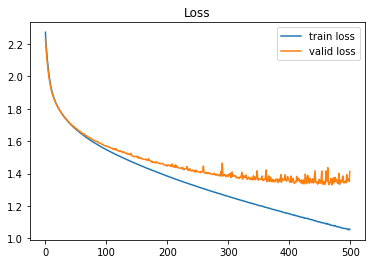

In [9]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()



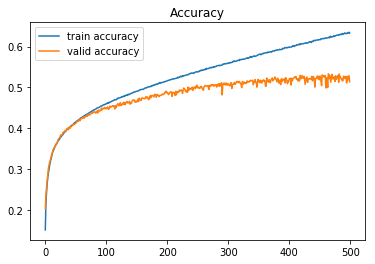

In [10]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()